# Feature Selection for CM1 Software Defect Prediction Dataset

This notebook implements various feature selection techniques to identify the most important features for software defect prediction in the CM1 aerospace dataset.

## Feature Selection Methods Used:

### Univariate Selection Methods
1. **ANOVA F-value (f_classif)** - Measures linear dependency between features and target
2. **Mutual Information (mutual_info_classif)** - Captures non-linear relationships

### Model-Based Selection Methods
3. **Random Forest Importance** - Based on impurity reduction in decision trees
4. **Extra Trees Importance** - Similar to Random Forest with added randomization
5. **Recursive Feature Elimination (RFE)** - Recursively removes weakest features

### Correlation-Based Selection
6. **Correlation Matrix Analysis** - Identifies highly correlated features for redundancy removal

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, RFE
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

warnings.filterwarnings('ignore')

# Set visualization style
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

print('Libraries loaded successfully!')

Libraries loaded successfully!


## Loading CM1 Preprocessed Dataset

In [2]:
# Load the CM1 preprocessed dataset
try:
    df = pd.read_csv('cm1_preprocessed.csv')
    print(f'CM1 dataset loaded successfully with shape: {df.shape}')
    print(f'Dataset columns: {list(df.columns)}')
    print(f'First few rows:')
    print(df.head())
except Exception as e:
    print(f'Error loading dataset: {e}')

CM1 dataset loaded successfully with shape: (498, 22)
Dataset columns: ['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't', 'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount', 'defects']
First few rows:
        loc      v(g)     ev(g)     iv(g)         n         v         l  \
0  0.000237  0.004211  0.013793  0.006452  0.000145  0.000076  1.000000   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000058  0.769231   
2  0.054502  0.042105  0.000000  0.032258  0.029894  0.018052  0.084615   
3  0.045024  0.031579  0.103448  0.016129  0.022179  0.012584  0.046154   
4  0.054502  0.052632  0.172414  0.016129  0.034233  0.020213  0.046154   

          d         i             e  ...  lOCode  lOComment   lOBlank  \
0  0.010336  0.004427  6.036150e-07  ...  0.0250    0.00590  0.012195   
1  0.007951  0.003405  4.643192e-07  ...  0.0125    0.00295  0.006098   
2  0.075535  0.110801  1.363599e-03  .

## Data Exploration and Target Analysis

In [3]:
# Explore the target variable
print('Target Variable Analysis:')
print(f'Target column: defects')
print(f'Class distribution:')
print(df['defects'].value_counts())
print(f'Class distribution (percentage):')
print(df['defects'].value_counts(normalize=True) * 100)

# Basic statistics
print(f'Dataset Info:')
print(f'Total samples: {len(df)}')
print(f'Total features: {len(df.columns) - 1}')
print(f'Defective modules: {df["defects"].sum()}')
print(f'Non-defective modules: {len(df) - df["defects"].sum()}')

# Check for missing values
print(f'Missing values:')
print(df.isnull().sum())

Target Variable Analysis:
Target column: defects
Class distribution:
defects
False    449
True      49
Name: count, dtype: int64
Class distribution (percentage):
defects
False    90.160643
True      9.839357
Name: proportion, dtype: float64
Dataset Info:
Total samples: 498
Total features: 21
Defective modules: 49
Non-defective modules: 449
Missing values:
loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64


## Prepare Data for Feature Selection

In [4]:
# Separate features and target
X = df.drop('defects', axis=1)  # All columns except target
y = df['defects']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature names: {list(X.columns)}")

# Convert boolean target to integer if needed
if y.dtype == 'bool':
    y = y.astype(int)
    print("\nConverted boolean target to integer (False=0, True=1)")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"\nTraining set defect distribution: {y_train.value_counts()}")
print(f"Test set defect distribution: {y_test.value_counts()}")

print("\n--- FEATURE SELECTION METHODS ---")


Features shape: (498, 21)
Target shape: (498,)

Feature names: ['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't', 'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount']

Converted boolean target to integer (False=0, True=1)

Training set: 348 samples
Test set: 150 samples

Training set defect distribution: defects
0    314
1     34
Name: count, dtype: int64
Test set defect distribution: defects
0    135
1     15
Name: count, dtype: int64

--- FEATURE SELECTION METHODS ---


## 1. Univariate Selection - ANOVA F-value
Evaluates each feature individually in relation to the defect target variable.


1. Univariate Selection (ANOVA F-value):


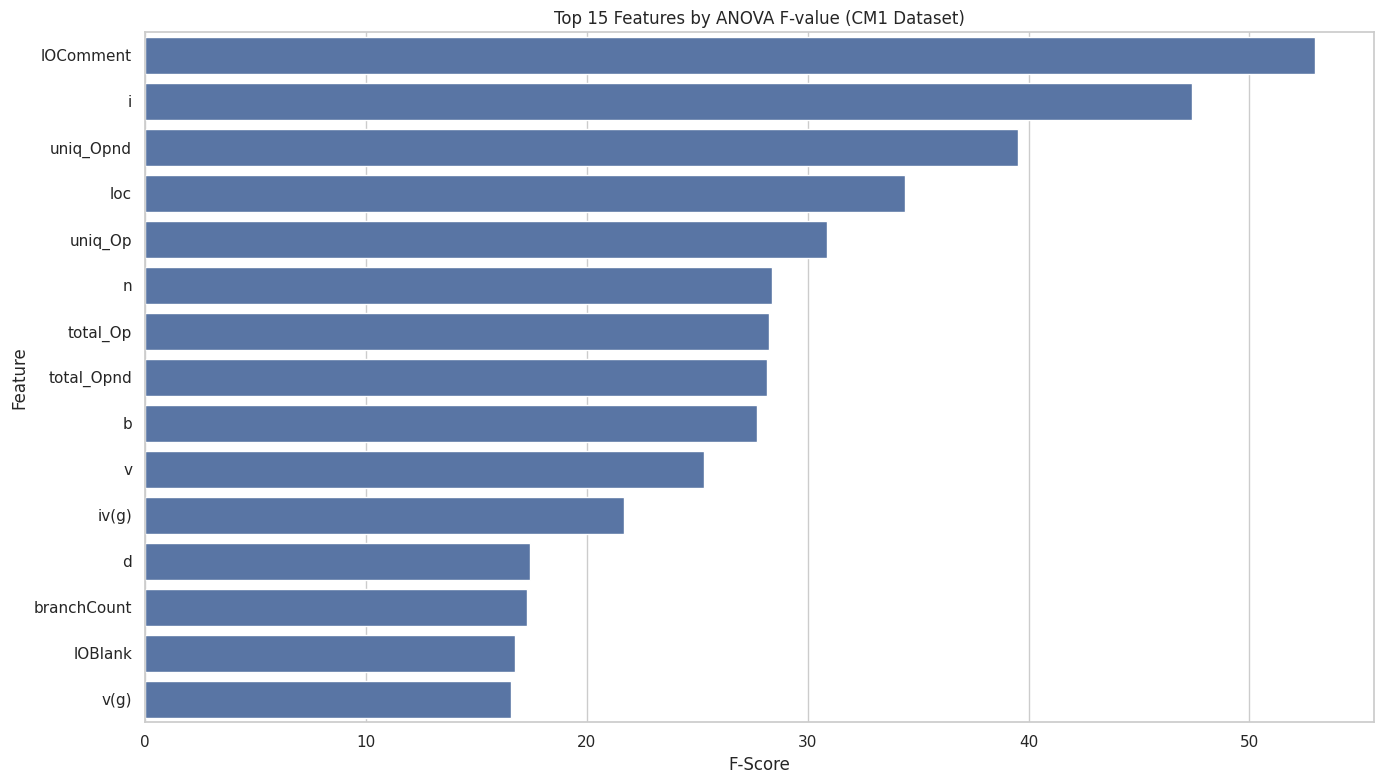

Top 15 features by ANOVA F-value:
        Feature      Score
13    lOComment  52.994606
8             i  47.398452
17    uniq_Opnd  39.540903
0           loc  34.416696
16      uniq_Op  30.894401
4             n  28.399104
18     total_Op  28.232303
19   total_Opnd  28.146324
10            b  27.688707
5             v  25.321192
3         iv(g)  21.667947
7             d  17.412923
20  branchCount  17.303791
14      lOBlank  16.758650
1          v(g)  16.543456


In [5]:
print("\n1. Univariate Selection (ANOVA F-value):")
selector_f = SelectKBest(score_func=f_classif, k=10)
selector_f.fit(X_train, y_train)

# Get scores and create dataframe for visualization
f_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector_f.scores_
})
f_scores = f_scores.sort_values('Score', ascending=False)

# Plot the scores
plt.figure(figsize=(14, 8))
sns.barplot(x='Score', y='Feature', data=f_scores[:15])
plt.title('Top 15 Features by ANOVA F-value (CM1 Dataset)')
plt.xlabel('F-Score')
plt.tight_layout()
plt.savefig('cm1_feature_selection_anova.png', dpi=300, bbox_inches='tight')
plt.show()

print("Top 15 features by ANOVA F-value:")
print(f_scores[:15])

## 2. Mutual Information


2. Mutual Information:


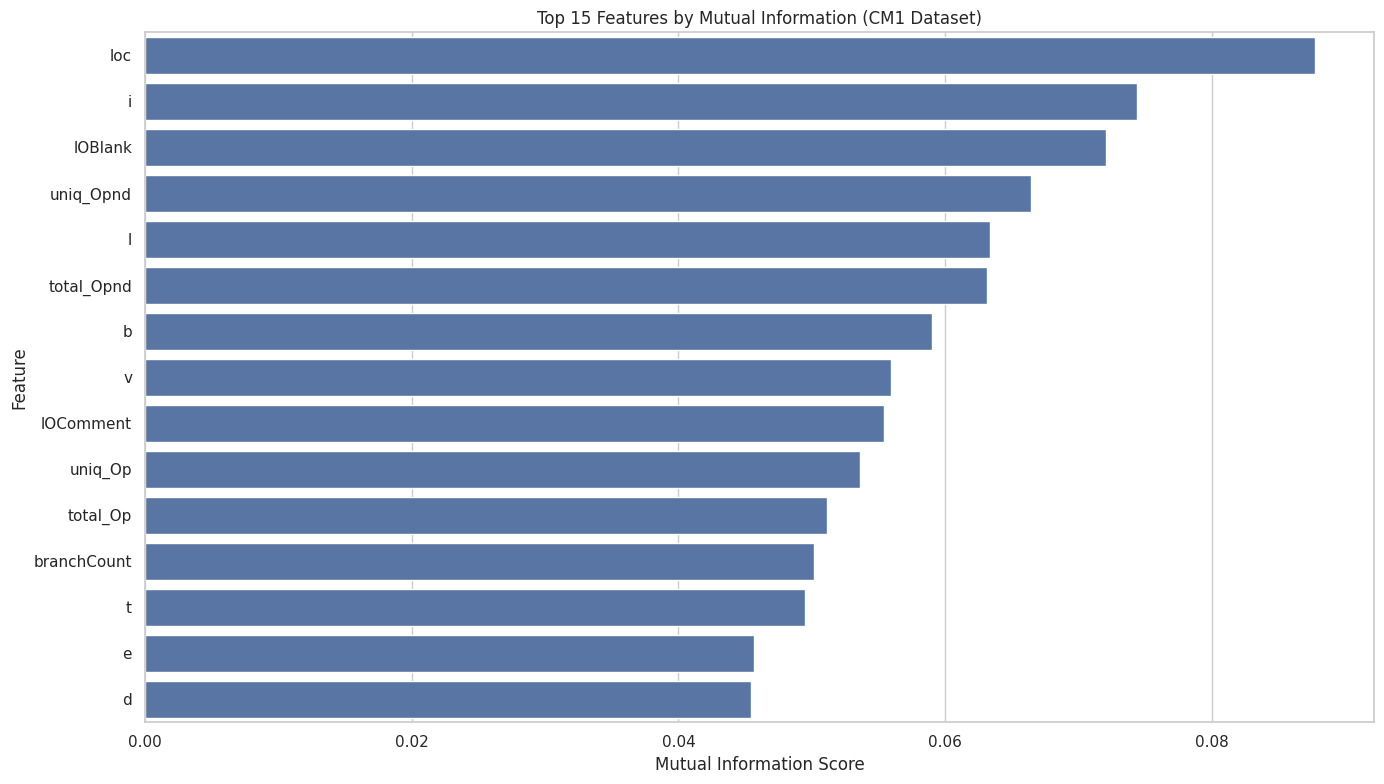

Top 15 features by Mutual Information:
        Feature     Score
0           loc  0.087792
8             i  0.074414
14      lOBlank  0.072085
17    uniq_Opnd  0.066434
6             l  0.063377
19   total_Opnd  0.063123
10            b  0.059007
5             v  0.055918
13    lOComment  0.055450
16      uniq_Op  0.053650
18     total_Op  0.051175
20  branchCount  0.050183
11            t  0.049504
9             e  0.045672
7             d  0.045476


In [6]:
print("\n2. Mutual Information:")
selector_mi = SelectKBest(score_func=mutual_info_classif, k=10)
selector_mi.fit(X_train, y_train)

# Get scores
mi_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector_mi.scores_
})
mi_scores = mi_scores.sort_values('Score', ascending=False)

# Plot the scores
plt.figure(figsize=(14, 8))
sns.barplot(x='Score', y='Feature', data=mi_scores[:15])
plt.title('Top 15 Features by Mutual Information (CM1 Dataset)')
plt.xlabel('Mutual Information Score')
plt.tight_layout()
plt.savefig('cm1_feature_selection_mi.png', dpi=300, bbox_inches='tight')
plt.show()

print("Top 15 features by Mutual Information:")
print(mi_scores[:15])

## 3. Feature Importance using Random Forest


3. Feature Importance (Random Forest):


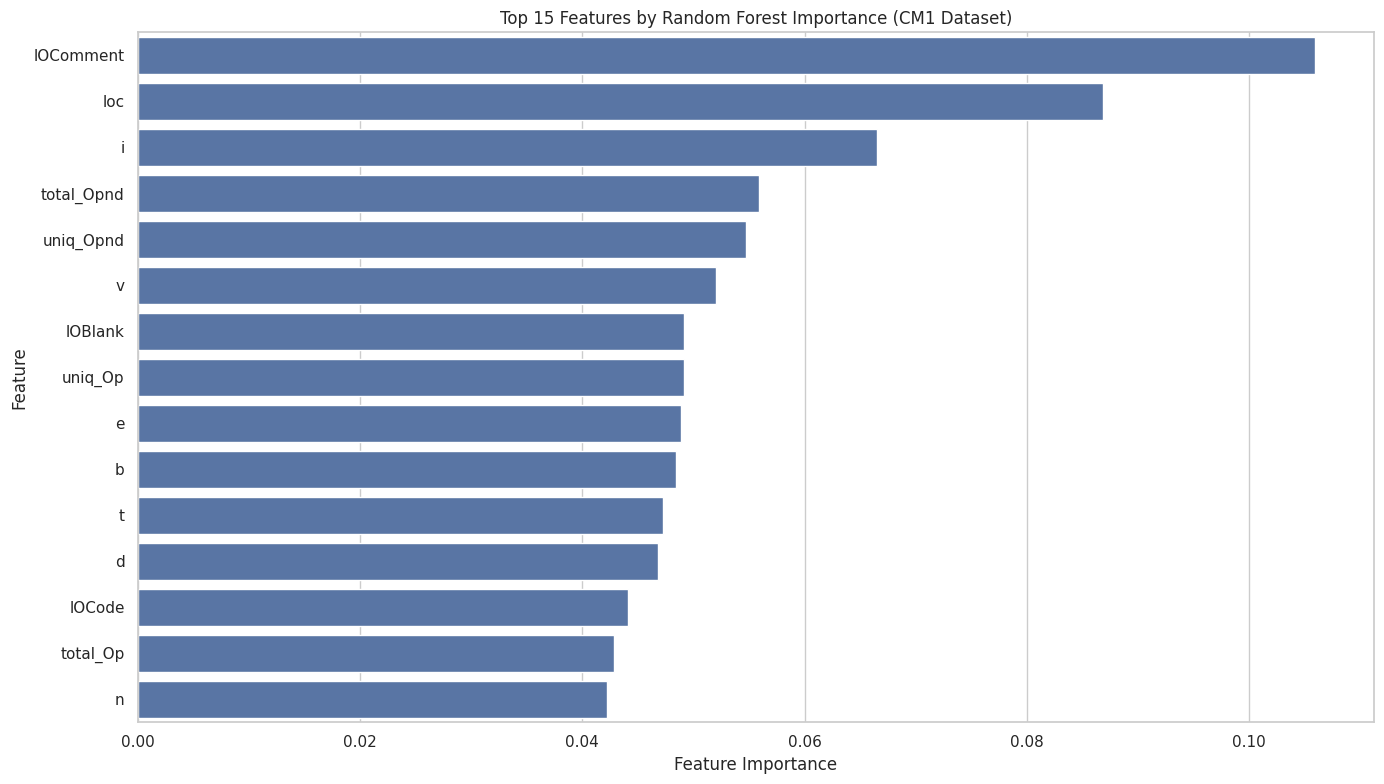

Top 15 features by Random Forest Importance:
       Feature  Importance
13   lOComment    0.105950
0          loc    0.086879
8            i    0.066480
19  total_Opnd    0.055915
17   uniq_Opnd    0.054774
5            v    0.052030
14     lOBlank    0.049183
16     uniq_Op    0.049182
9            e    0.048877
10           b    0.048444
11           t    0.047238
7            d    0.046774
12      lOCode    0.044129
18    total_Op    0.042829
4            n    0.042217


In [7]:
print("\n3. Feature Importance (Random Forest):")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
rf_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
})
rf_importances = rf_importances.sort_values('Importance', ascending=False)

# Plot the importances
plt.figure(figsize=(14, 8))
sns.barplot(x='Importance', y='Feature', data=rf_importances[:15])
plt.title('Top 15 Features by Random Forest Importance (CM1 Dataset)')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.savefig('cm1_feature_selection_rf.png', dpi=300, bbox_inches='tight')
plt.show()

print("Top 15 features by Random Forest Importance:")
print(rf_importances[:15])

## 4. Feature Importance using Extra Trees


4. Feature Importance (Extra Trees):


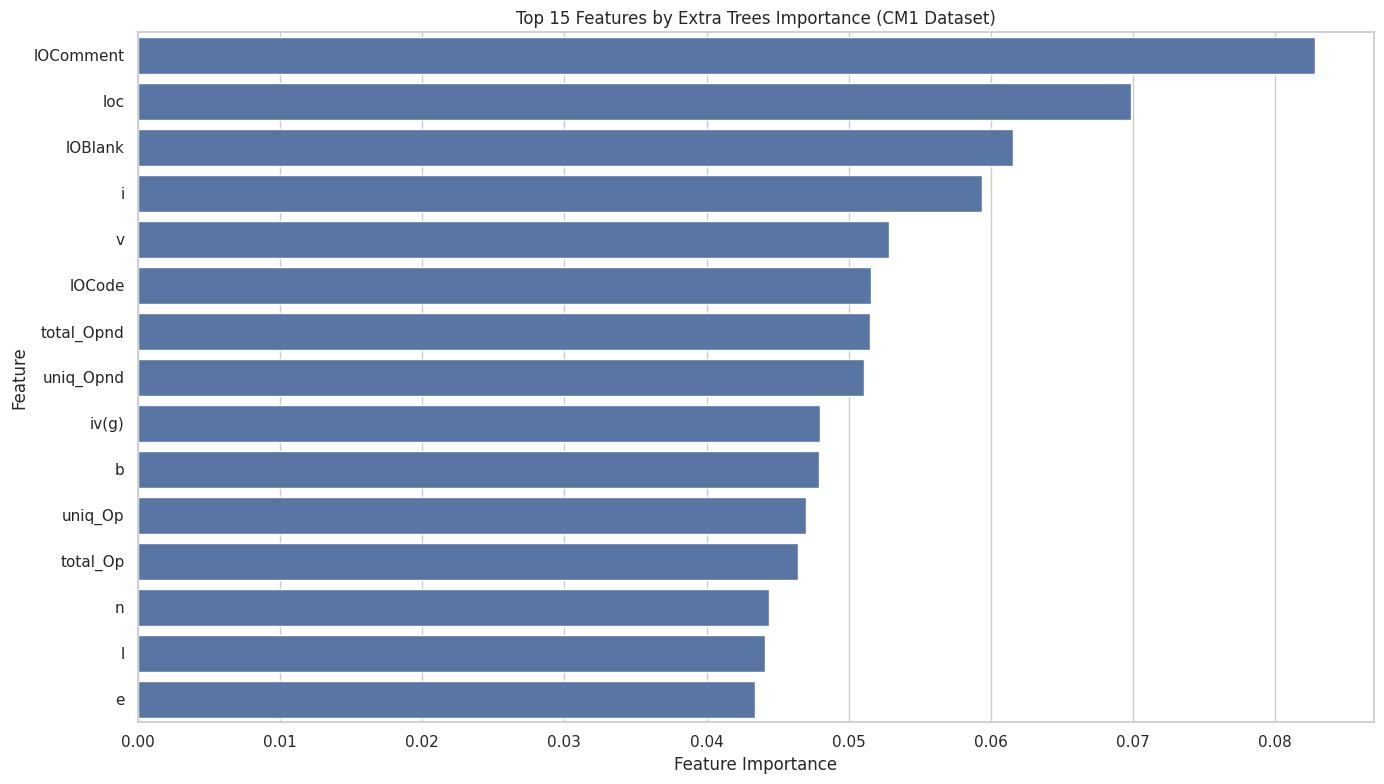

Top 15 features by Extra Trees Importance:
       Feature  Importance
13   lOComment    0.082800
0          loc    0.069880
14     lOBlank    0.061579
8            i    0.059356
5            v    0.052797
12      lOCode    0.051532
19  total_Opnd    0.051492
17   uniq_Opnd    0.051056
3        iv(g)    0.048009
10           b    0.047921
16     uniq_Op    0.047016
18    total_Op    0.046449
4            n    0.044412
6            l    0.044095
9            e    0.043408


In [8]:
print("\n4. Feature Importance (Extra Trees):")
et = ExtraTreesClassifier(n_estimators=100, random_state=42)
et.fit(X_train, y_train)

# Get feature importances
et_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': et.feature_importances_
})
et_importances = et_importances.sort_values('Importance', ascending=False)

# Plot the importances
plt.figure(figsize=(14, 8))
sns.barplot(x='Importance', y='Feature', data=et_importances[:15])
plt.title('Top 15 Features by Extra Trees Importance (CM1 Dataset)')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.savefig('cm1_feature_selection_et.png', dpi=300, bbox_inches='tight')
plt.show()

print("Top 15 features by Extra Trees Importance:")
print(et_importances[:15])

## 5. Recursive Feature Elimination (RFE)


5. Recursive Feature Elimination (RFE):
Features selected by RFE:
      Feature  Selected  Rank
0         loc      True     1
2       ev(g)      True     1
6           l      True     1
7           d      True     1
8           i      True     1
9           e      True     1
12     lOCode      True     1
13  lOComment      True     1
16    uniq_Op      True     1
17  uniq_Opnd      True     1


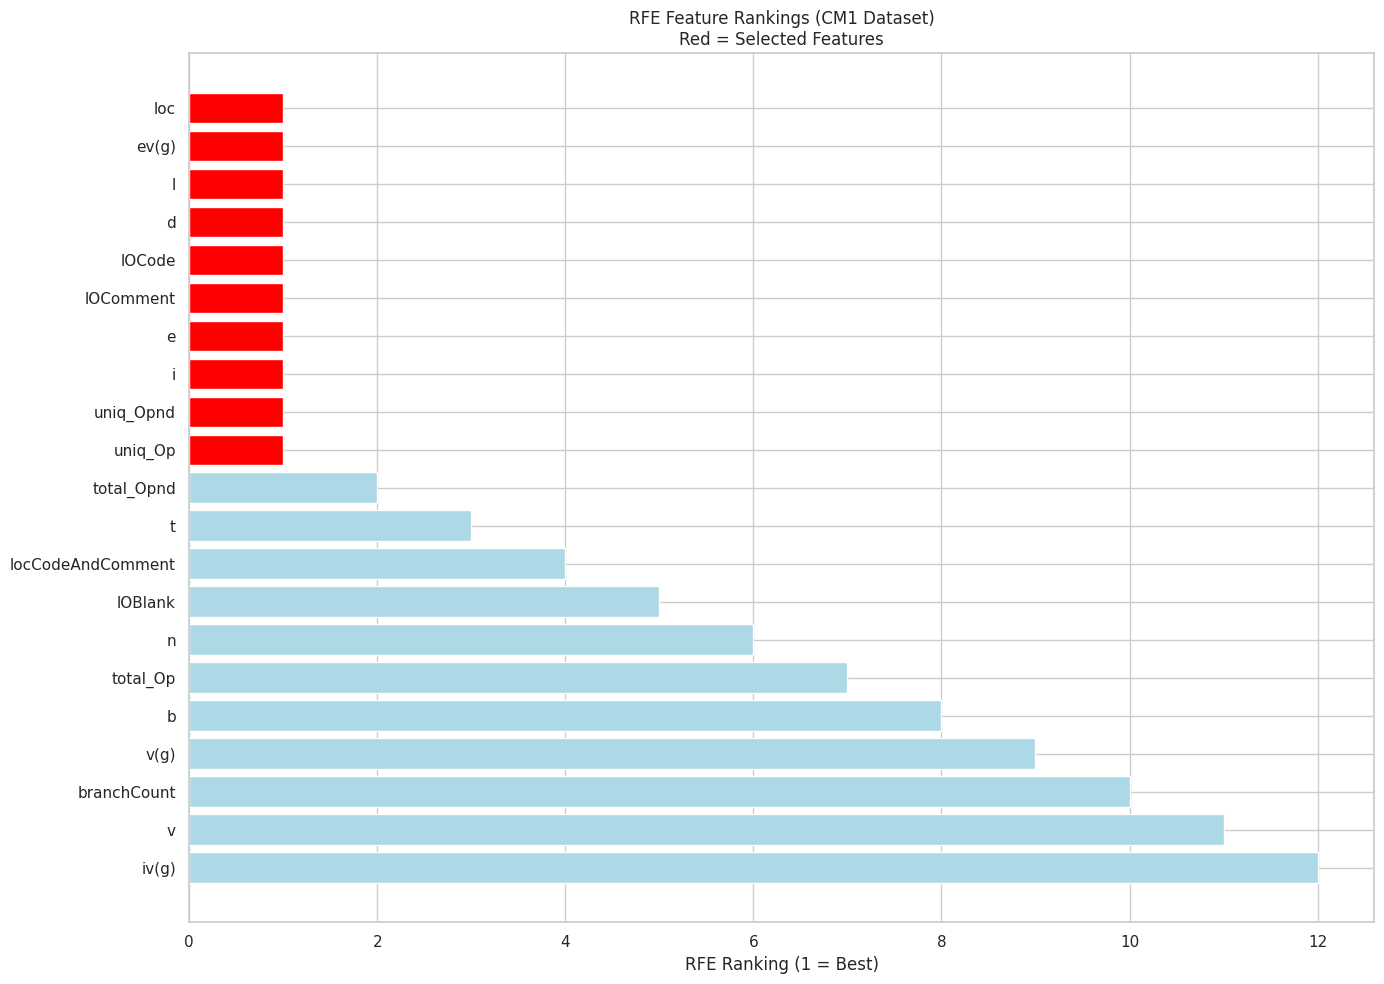

In [9]:
print("\n5. Recursive Feature Elimination (RFE):")
model = LogisticRegression(max_iter=1000, random_state=42)
rfe = RFE(estimator=model, n_features_to_select=10, step=1)
rfe.fit(X_train, y_train)

# Get selected features
rfe_features = pd.DataFrame({
    'Feature': X.columns,
    'Selected': rfe.support_,
    'Rank': rfe.ranking_
})
rfe_selected = rfe_features[rfe_features['Selected']].sort_values('Rank')

print("Features selected by RFE:")
print(rfe_selected)

# Visualize RFE ranking for all features
plt.figure(figsize=(14, 10))
rfe_all = rfe_features.sort_values('Rank')
colors = ['red' if selected else 'lightblue' for selected in rfe_all['Selected']]
plt.barh(range(len(rfe_all)), rfe_all['Rank'], color=colors)
plt.yticks(range(len(rfe_all)), rfe_all['Feature'])
plt.xlabel('RFE Ranking (1 = Best)')
plt.title('RFE Feature Rankings (CM1 Dataset)\nRed = Selected Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('cm1_rfe_rankings.png', dpi=300, bbox_inches='tight')
plt.show()

## 6. Feature selection based on correlation matrix


6. Correlation Matrix Analysis:
Found 86 highly correlated feature pairs (correlation > 0.8):
v(g) <-> loc: 0.943
ev(g) <-> v(g): 0.807
iv(g) <-> loc: 0.919
iv(g) <-> v(g): 0.930
n <-> loc: 0.940
n <-> v(g): 0.908
n <-> iv(g): 0.870
v <-> loc: 0.953
v <-> v(g): 0.920
v <-> iv(g): 0.890
v <-> n: 0.993
d <-> n: 0.841
i <-> n: 0.810
e <-> loc: 0.815
e <-> v(g): 0.856
e <-> iv(g): 0.826
e <-> n: 0.844
e <-> v: 0.877
b <-> loc: 0.943
b <-> v(g): 0.912
b <-> iv(g): 0.883
b <-> n: 0.984
b <-> v: 0.992
b <-> e: 0.871
t <-> loc: 0.815
t <-> v(g): 0.856
t <-> iv(g): 0.826
t <-> n: 0.844
t <-> v: 0.877
t <-> e: 1.000
t <-> b: 0.871
lOComment <-> loc: 0.863
lOComment <-> v: 0.814
lOComment <-> b: 0.807
uniq_Op <-> loc: 0.803
uniq_Op <-> v(g): 0.801
uniq_Op <-> n: 0.837
uniq_Op <-> v: 0.808
uniq_Op <-> d: 0.884
uniq_Opnd <-> loc: 0.943
uniq_Opnd <-> v(g): 0.860
uniq_Opnd <-> iv(g): 0.857
uniq_Opnd <-> n: 0.947
uniq_Opnd <-> v: 0.949
uniq_Opnd <-> i: 0.914
uniq_Opnd <-> b: 0.939
uniq_Opnd <-> lOCom

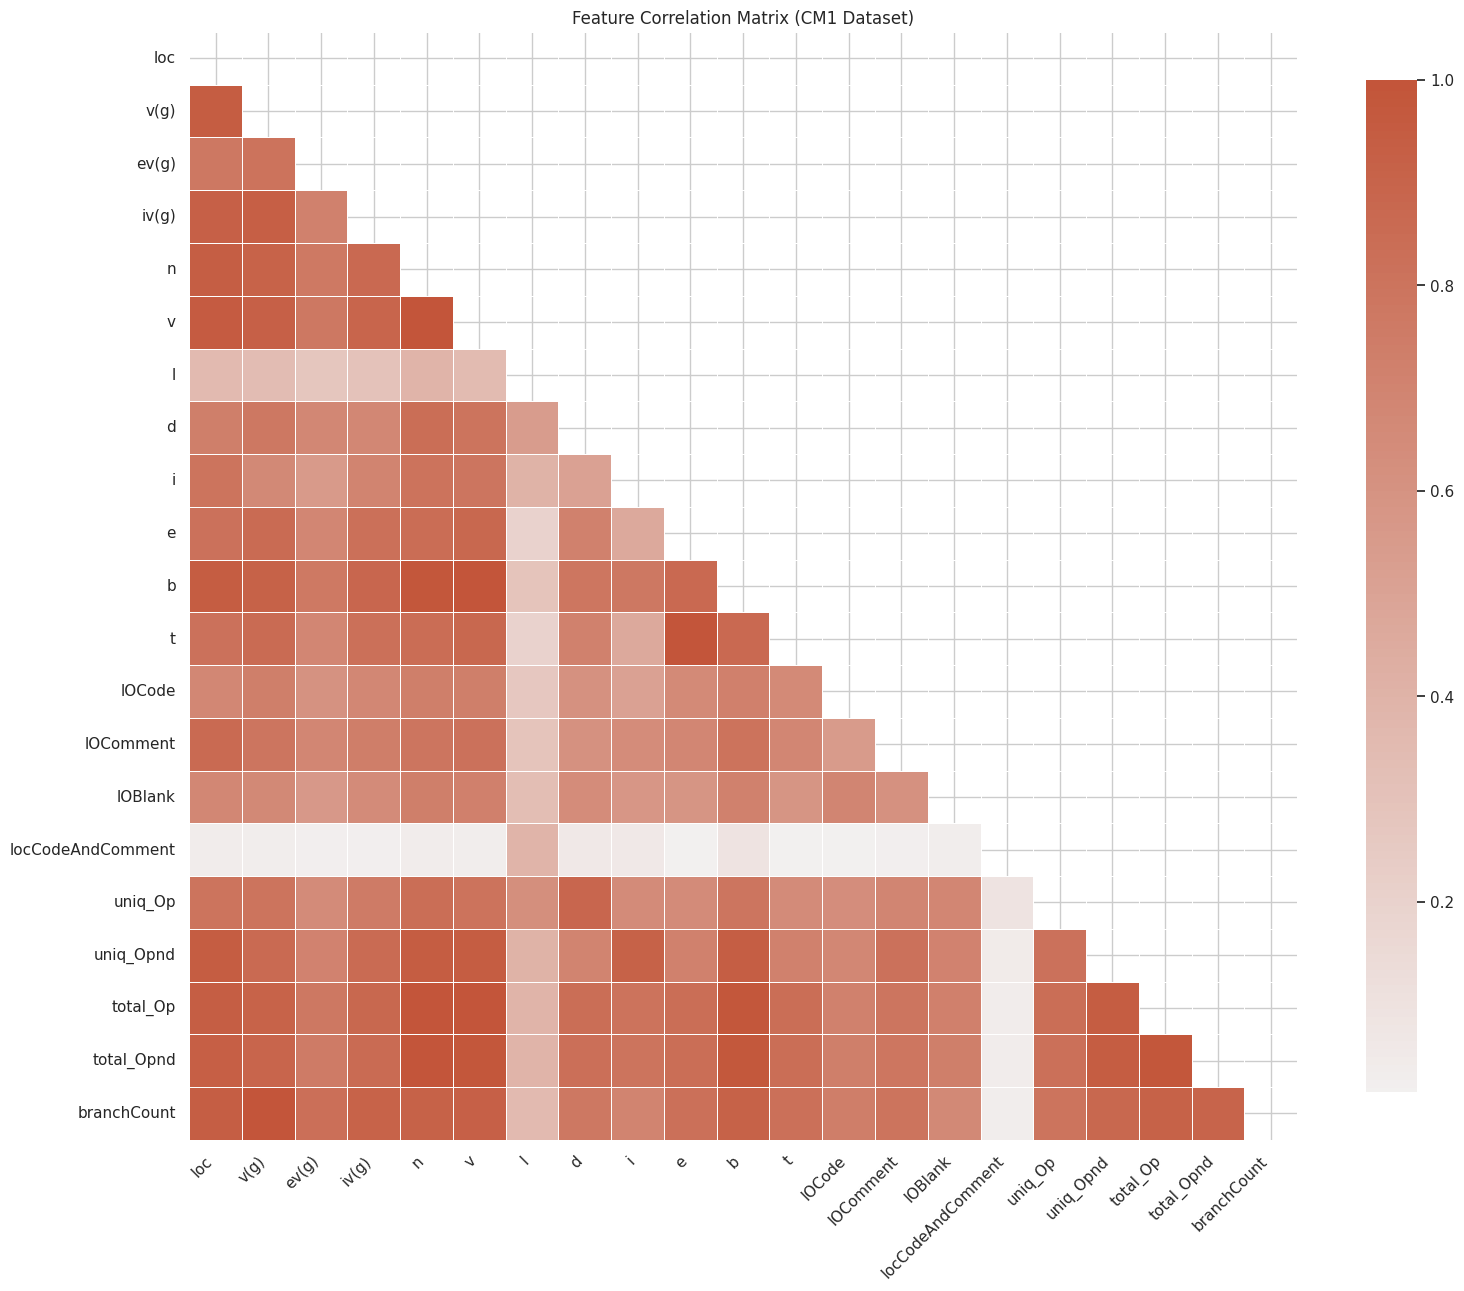

In [10]:
print("\n6. Correlation Matrix Analysis:")
# Calculate correlation matrix
corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.8
high_corr_pairs = []
high_corr_features = set()
for column in upper.columns:
    high_corr_in_col = upper[column][upper[column] > 0.8]
    if not high_corr_in_col.empty:
        for idx, corr_val in high_corr_in_col.items():
            high_corr_pairs.append((column, idx, corr_val))
            high_corr_features.add(column)
            high_corr_features.add(idx)

print(f"Found {len(high_corr_pairs)} highly correlated feature pairs (correlation > 0.8):")
for feat1, feat2, corr_val in high_corr_pairs:
    print(f"{feat1} <-> {feat2}: {corr_val:.3f}")

high_corr = list(high_corr_features)
print(f"\nFeatures involved in high correlation: {high_corr}")

# Plot correlation matrix (focus on top correlations)
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Create heatmap
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix (CM1 Dataset)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('cm1_feature_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

## Consolidate Results Across Methods


--- CONSOLIDATED RESULTS ---

Consolidated feature ranking (score = number of times in top selections):
              Feature  Score
0                 loc    4.5
13          lOComment    4.5
17          uniq_Opnd    4.5
8                   i    4.5
5                   v    3.5
16            uniq_Op    3.5
19         total_Opnd    3.5
10                  b    3.5
14            lOBlank    3.0
6                   l    2.0
12             lOCode    2.0
9                   e    1.5
2               ev(g)    0.5
18           total_Op    0.5
4                   n    0.5
3               iv(g)    0.5
7                   d    0.5
15  locCodeAndComment    0.0
1                v(g)   -0.5
11                  t   -0.5


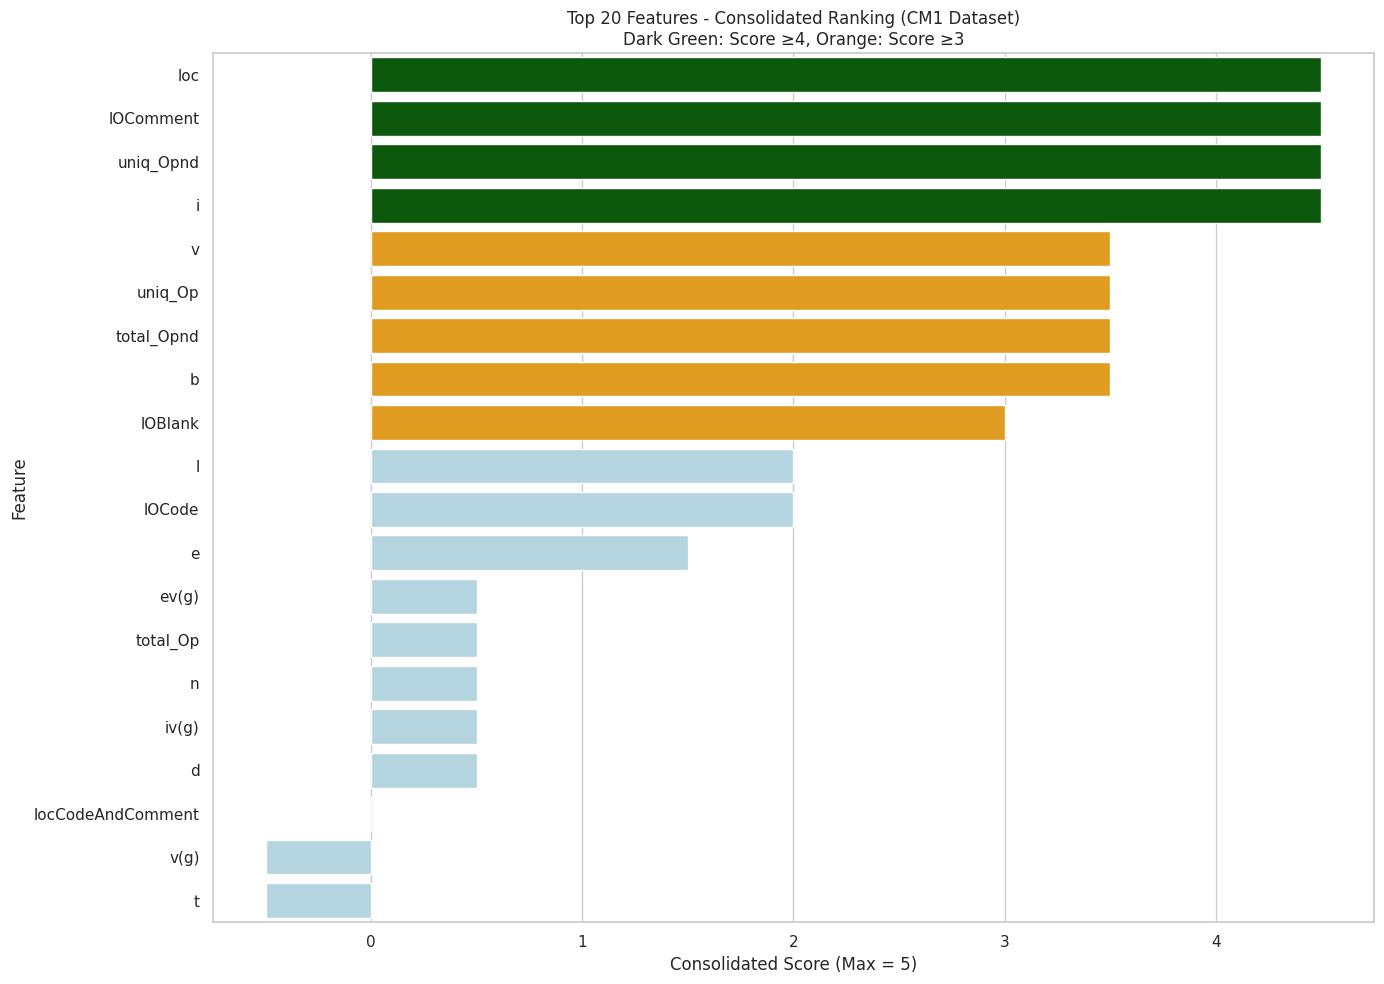

In [11]:
print("\n--- CONSOLIDATED RESULTS ---")

# Count how many times each feature appears in the top 10 across methods
feature_counts = {}
for feature in X.columns:
    count = 0

    # ANOVA F-test (top 10)
    if feature in f_scores[:10]['Feature'].values:
        count += 1

    # Mutual Information (top 10)
    if feature in mi_scores[:10]['Feature'].values:
        count += 1

    # Random Forest (top 10)
    if feature in rf_importances[:10]['Feature'].values:
        count += 1

    # Extra Trees (top 10)
    if feature in et_importances[:10]['Feature'].values:
        count += 1

    # RFE selected features
    if feature in rfe_selected['Feature'].values:
        count += 1

    # Subtract points for highly correlated features (to discourage redundancy)
    if feature in high_corr:
        count -= 0.5  # Penalty for high correlation

    feature_counts[feature] = count

# Convert to DataFrame for better visualization
feature_ranking = pd.DataFrame({
    'Feature': list(feature_counts.keys()),
    'Score': list(feature_counts.values())
})
feature_ranking = feature_ranking.sort_values('Score', ascending=False)

print("\nConsolidated feature ranking (score = number of times in top selections):")
print(feature_ranking.head(20))

# Plot consolidated ranking
plt.figure(figsize=(14, 10))
top_features = feature_ranking.head(20)
colors = ['darkgreen' if score >= 4 else 'orange' if score >= 3 else 'lightblue'
          for score in top_features['Score']]
sns.barplot(x='Score', y='Feature', data=top_features, palette=colors)
plt.title('Top 20 Features - Consolidated Ranking (CM1 Dataset)\nDark Green: Score ≥4, Orange: Score ≥3')
plt.xlabel('Consolidated Score (Max = 5)')
plt.tight_layout()
plt.savefig('cm1_feature_consolidated_ranking.png', dpi=300, bbox_inches='tight')
plt.show()

## Model Evaluation with Different Feature Sets

In [12]:
print("\n--- MODEL EVALUATION WITH DIFFERENT FEATURE SETS ---")

def evaluate_feature_set(features, name):
    """Evaluate model performance with given feature set"""
    X_train_selected = X_train[features]
    X_test_selected = X_test[features]

    models = {
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
        "SVM": SVC(random_state=42)
    }

    results = {}
    for model_name, model in models.items():
        model.fit(X_train_selected, y_train)
        y_pred = model.predict(X_test_selected)
        acc = accuracy_score(y_test, y_pred)
        results[model_name] = acc

    print(f"\nFeature set: {name} ({len(features)} features)")
    for model_name, acc in results.items():
        print(f"{model_name}: {acc:.4f}")

    return results


--- MODEL EVALUATION WITH DIFFERENT FEATURE SETS ---


In [13]:
# Top 5 features from consolidated ranking
top5_features = feature_ranking.head(5)['Feature'].tolist()
print(f"Top 5 features: {top5_features}")
results_top5 = evaluate_feature_set(top5_features, "Top 5 consolidated")

Top 5 features: ['loc', 'lOComment', 'uniq_Opnd', 'i', 'v']

Feature set: Top 5 consolidated (5 features)
Random Forest: 0.8867
Decision Tree: 0.8133
Logistic Regression: 0.9000
SVM: 0.8933


In [14]:
# Top 10 features from consolidated ranking
top10_features = feature_ranking.head(10)['Feature'].tolist()
print(f"Top 10 features: {top10_features}")
results_top10 = evaluate_feature_set(top10_features, "Top 10 consolidated")

Top 10 features: ['loc', 'lOComment', 'uniq_Opnd', 'i', 'v', 'uniq_Op', 'total_Opnd', 'b', 'lOBlank', 'l']

Feature set: Top 10 consolidated (10 features)
Random Forest: 0.8667
Decision Tree: 0.8067
Logistic Regression: 0.9000
SVM: 0.9000

Feature set: Top 10 consolidated (10 features)
Random Forest: 0.8667
Decision Tree: 0.8067
Logistic Regression: 0.9000
SVM: 0.9000


In [15]:
# Top 10 features from Random Forest
top10_rf = rf_importances.head(10)['Feature'].tolist()
print(f"Top 10 RF features: {top10_rf}")
results_rf = evaluate_feature_set(top10_rf, "Top 10 Random Forest")

Top 10 RF features: ['lOComment', 'loc', 'i', 'total_Opnd', 'uniq_Opnd', 'v', 'lOBlank', 'uniq_Op', 'e', 'b']

Feature set: Top 10 Random Forest (10 features)
Random Forest: 0.8800
Decision Tree: 0.7533
Logistic Regression: 0.9000
SVM: 0.9000


In [16]:
# Top 10 features from ANOVA
top10_anova = f_scores.head(10)['Feature'].tolist()
print(f"Top 10 ANOVA features: {top10_anova}")
results_anova = evaluate_feature_set(top10_anova, "Top 10 ANOVA")

Top 10 ANOVA features: ['lOComment', 'i', 'uniq_Opnd', 'loc', 'uniq_Op', 'n', 'total_Op', 'total_Opnd', 'b', 'v']

Feature set: Top 10 ANOVA (10 features)
Random Forest: 0.8733
Decision Tree: 0.7867
Logistic Regression: 0.9000
SVM: 0.9000

Feature set: Top 10 ANOVA (10 features)
Random Forest: 0.8733
Decision Tree: 0.7867
Logistic Regression: 0.9000
SVM: 0.9000


In [17]:
# RFE selected features
rfe_feature_list = rfe_selected['Feature'].tolist()
print(f"RFE selected features: {rfe_feature_list}")
results_rfe = evaluate_feature_set(rfe_feature_list, "RFE Selected")

RFE selected features: ['loc', 'ev(g)', 'l', 'd', 'i', 'e', 'lOCode', 'lOComment', 'uniq_Op', 'uniq_Opnd']

Feature set: RFE Selected (10 features)
Random Forest: 0.8933
Decision Tree: 0.8533
Logistic Regression: 0.9000
SVM: 0.8933

Feature set: RFE Selected (10 features)
Random Forest: 0.8933
Decision Tree: 0.8533
Logistic Regression: 0.9000
SVM: 0.8933


In [18]:
# All features except highly correlated ones
all_except_correlated = [f for f in X.columns if f not in high_corr]
print(f"Features excluding highly correlated: {len(all_except_correlated)} features")
results_no_corr = evaluate_feature_set(all_except_correlated, "All except highly correlated")

Features excluding highly correlated: 4 features

Feature set: All except highly correlated (4 features)
Random Forest: 0.8933
Decision Tree: 0.7933
Logistic Regression: 0.9000
SVM: 0.9000

Feature set: All except highly correlated (4 features)
Random Forest: 0.8933
Decision Tree: 0.7933
Logistic Regression: 0.9000
SVM: 0.9000


## Detailed Evaluation of Best Feature Set


Detailed Classification Report (Random Forest with Top 10 Features):
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       135
           1       0.14      0.07      0.09        15

    accuracy                           0.87       150
   macro avg       0.52      0.51      0.51       150
weighted avg       0.83      0.87      0.84       150



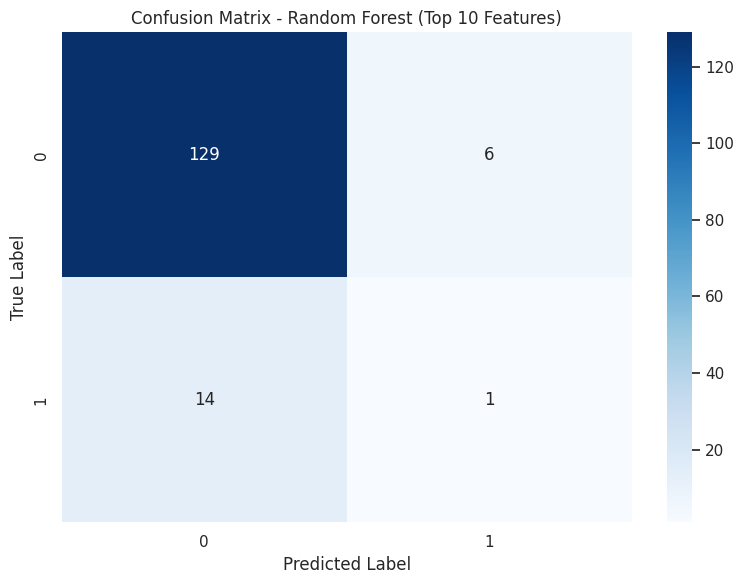

In [19]:
# Use the top 10 consolidated features for detailed evaluation
best_features = top10_features
X_train_best = X_train[best_features]
X_test_best = X_test[best_features]

# Train Random Forest with best features
rf_best = RandomForestClassifier(n_estimators=100, random_state=42)
rf_best.fit(X_train_best, y_train)
y_pred_best = rf_best.predict(X_test_best)

# Detailed classification report
print("\nDetailed Classification Report (Random Forest with Top 10 Features):")
print(classification_report(y_test, y_pred_best))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest (Top 10 Features)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('cm1_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

## Save Final Recommended Feature Set

In [20]:
# Save final recommended feature set for CM1 dataset
recommended_features = feature_ranking.head(15)['Feature'].tolist()

with open('cm1_recommended_features.txt', 'w') as f:
    f.write("Recommended features for CM1 software defect prediction:\n\n")
    f.write("Dataset: CM1 Preprocessed\n")
    f.write(f"Total samples: {len(df)}\n")
    f.write(f"Total features available: {len(X.columns)}\n")
    f.write(f"Defect rate: {(df['defects'].sum() / len(df) * 100):.2f}%\n\n")

    f.write("TOP 15 RECOMMENDED FEATURES:\n")
    f.write("=" * 50 + "\n")
    for i, (_, row) in enumerate(feature_ranking.head(15).iterrows(), 1):
        f.write(f"{i:2d}. {row['Feature']:<15} (Score: {row['Score']:.1f})\n")

    f.write("\n\nFEATURE SELECTION METHOD SUMMARY:\n")
    f.write("=" * 50 + "\n")
    f.write("1. ANOVA F-test (univariate)\n")
    f.write("2. Mutual Information (univariate)\n")
    f.write("3. Random Forest Importance\n")
    f.write("4. Extra Trees Importance\n")
    f.write("5. Recursive Feature Elimination\n")
    f.write("6. Correlation Analysis (penalty for high correlation)\n")

    f.write("\nScore = Number of methods that selected the feature (max=5)\n")
    f.write("Features with high correlation (>0.8) receive -0.5 penalty\n")

print("\nFinal recommended features have been saved to 'cm1_recommended_features.txt'")
print(f"\nTop 10 recommended features for CM1 defect prediction:")
for i, feature in enumerate(recommended_features[:10], 1):
    score = feature_ranking[feature_ranking['Feature'] == feature]['Score'].iloc[0]
    print(f"{i:2d}. {feature} (Score: {score:.1f})")


Final recommended features have been saved to 'cm1_recommended_features.txt'

Top 10 recommended features for CM1 defect prediction:
 1. loc (Score: 4.5)
 2. lOComment (Score: 4.5)
 3. uniq_Opnd (Score: 4.5)
 4. i (Score: 4.5)
 5. v (Score: 3.5)
 6. uniq_Op (Score: 3.5)
 7. total_Opnd (Score: 3.5)
 8. b (Score: 3.5)
 9. lOBlank (Score: 3.0)
10. l (Score: 2.0)


## Performance Comparison Visualization

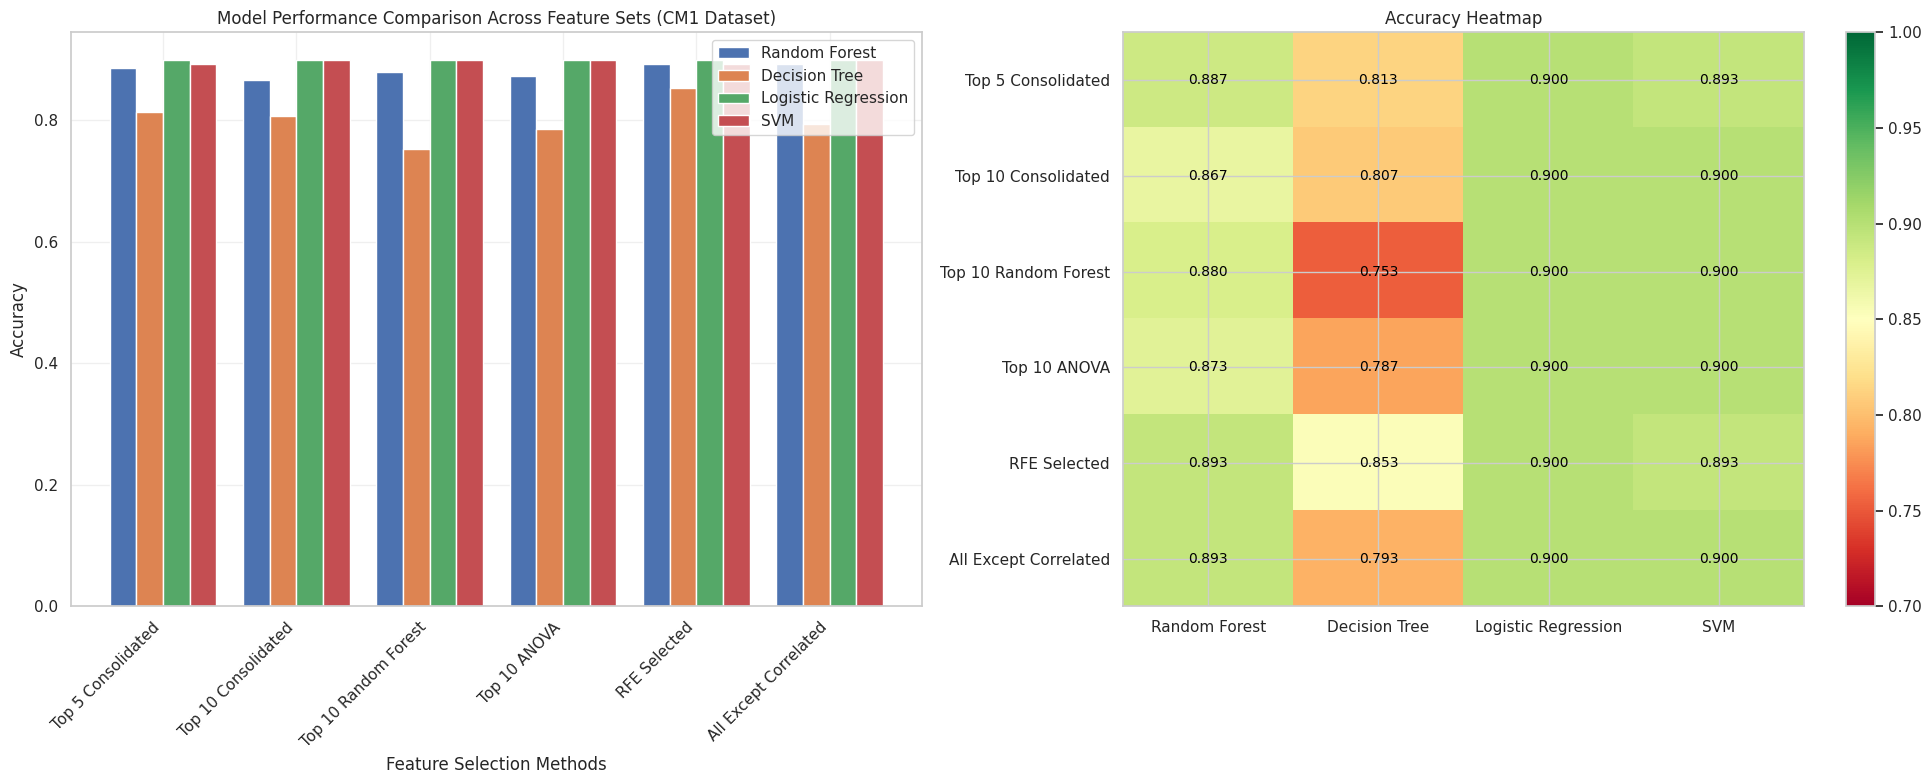


=== CM1 FEATURE SELECTION COMPLETED ===
Best performing method: RFE Selected
All visualizations have been saved as PNG files.
Recommended features saved to 'cm1_recommended_features.txt'


In [21]:
# Create a comprehensive comparison of all feature selection methods
def create_comparison_plot(results_dict):
    """Create a comprehensive comparison plot of different feature sets"""
    # Prepare data for plotting
    methods = list(results_dict.keys())
    models = list(results_dict[methods[0]].keys())

    # Create subplot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    # Bar plot comparison
    x = np.arange(len(methods))
    width = 0.2

    for i, model in enumerate(models):
        values = [results_dict[method][model] for method in methods]
        ax1.bar(x + i*width, values, width, label=model)

    ax1.set_xlabel('Feature Selection Methods')
    ax1.set_ylabel('Accuracy')
    ax1.set_title('Model Performance Comparison Across Feature Sets (CM1 Dataset)')
    ax1.set_xticks(x + width * 1.5)
    ax1.set_xticklabels(methods, rotation=45, ha='right')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Heatmap
    heatmap_data = []
    for method in methods:
        heatmap_data.append([results_dict[method][model] for model in models])

    im = ax2.imshow(heatmap_data, cmap='RdYlGn', aspect='auto', vmin=0.7, vmax=1.0)
    ax2.set_xticks(range(len(models)))
    ax2.set_xticklabels(models)
    ax2.set_yticks(range(len(methods)))
    ax2.set_yticklabels(methods)
    ax2.set_title('Accuracy Heatmap')

    # Add text annotations to heatmap
    for i in range(len(methods)):
        for j in range(len(models)):
            text = ax2.text(j, i, f'{heatmap_data[i][j]:.3f}',
                           ha="center", va="center", color="black", fontsize=10)

    plt.colorbar(im, ax=ax2)
    plt.tight_layout()
    plt.savefig('cm1_feature_selection_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

# Prepare results for comparison
all_results = {
    "Top 5 Consolidated": results_top5,
    "Top 10 Consolidated": results_top10,
    "Top 10 Random Forest": results_rf,
    "Top 10 ANOVA": results_anova,
    "RFE Selected": results_rfe,
    "All Except Correlated": results_no_corr
}

create_comparison_plot(all_results)

print("\n=== CM1 FEATURE SELECTION COMPLETED ===")
print(f"Best performing method: {max(all_results.keys(), key=lambda k: all_results[k]['Random Forest'])}")
print("All visualizations have been saved as PNG files.")
print("Recommended features saved to 'cm1_recommended_features.txt'")